<a href="https://colab.research.google.com/github/DataEtnos/Estudos-2/blob/main/K_Means_avalia%C3%A7%C3%A3o_de_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
%%capture
%pip install kmodes

In [49]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [50]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [51]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,3.174795,7.696540
1,3.549185,0.143651
2,8.127851,7.572115
3,10.117103,7.880083
4,4.346778,-0.267571


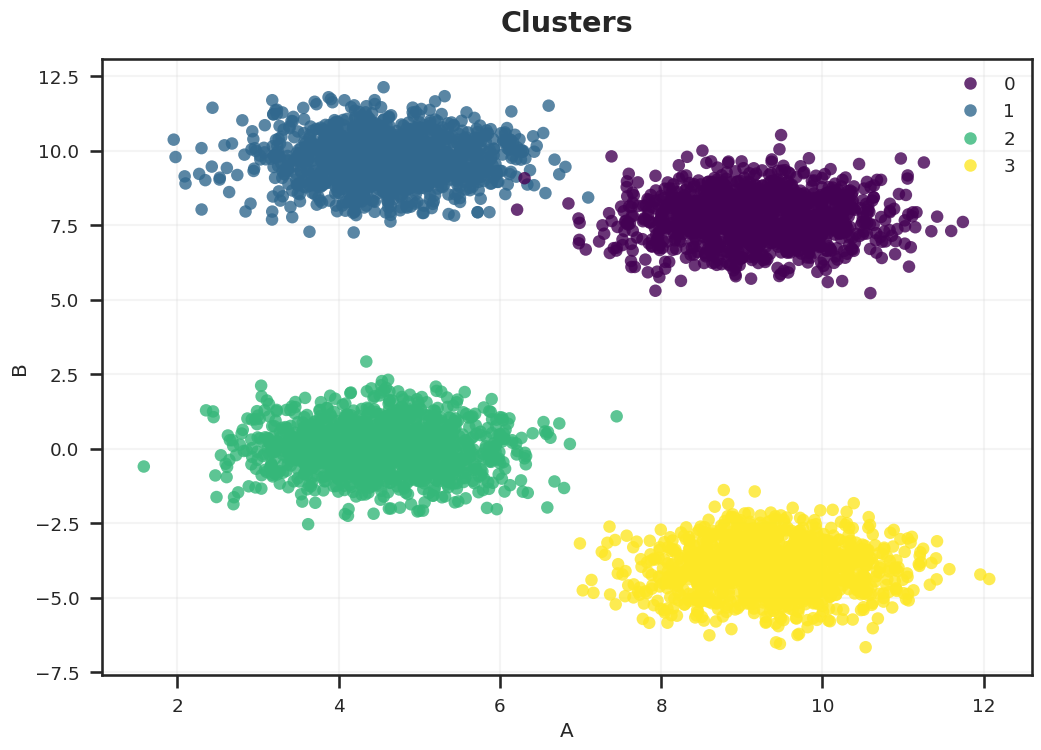

In [52]:
sns.scatterplot(data=df, x='A', y='B', hue = y, **scatter_kwargs)
plt.title('Clusters');


In [53]:
centroides ,  labels , inercia = k_means(df, n_clusters= 4 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [54]:
k_means?

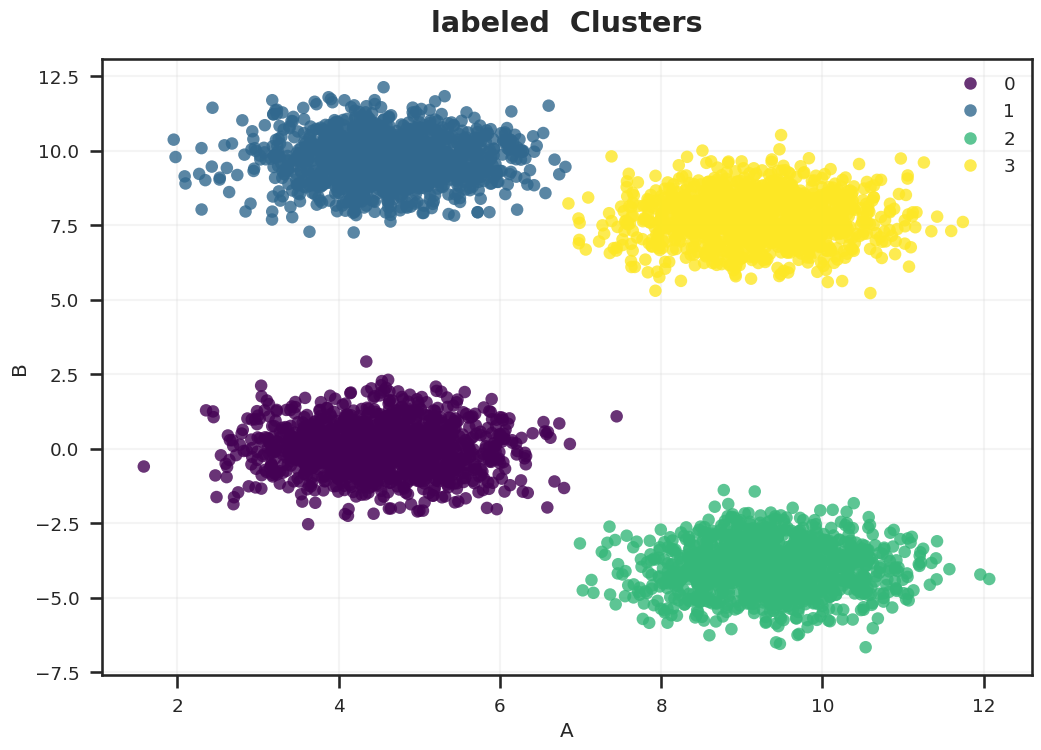

In [55]:
 sns.scatterplot(data = df , x = 'A',y= 'B', hue = labels, **scatter_kwargs)



plt.title('labeled  Clusters')
plt.show()

In [56]:
modelo =  KMeans(  n_clusters= 4 )
modelo.fit(df)


centroides = modelo.cluster_centers_
labels = modelo.labels_
inercia = modelo.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [57]:
print(centroides)
print(labels)
print(inercia)

[[ 4.58614072e+00  9.69391338e+00]
 [ 4.50905122e+00  1.95405273e-03]
 [ 9.36604762e+00 -3.99656835e+00]
 [ 9.18230043e+00  7.73709004e+00]]
[0 1 3 ... 3 0 2]
6407.742719387135


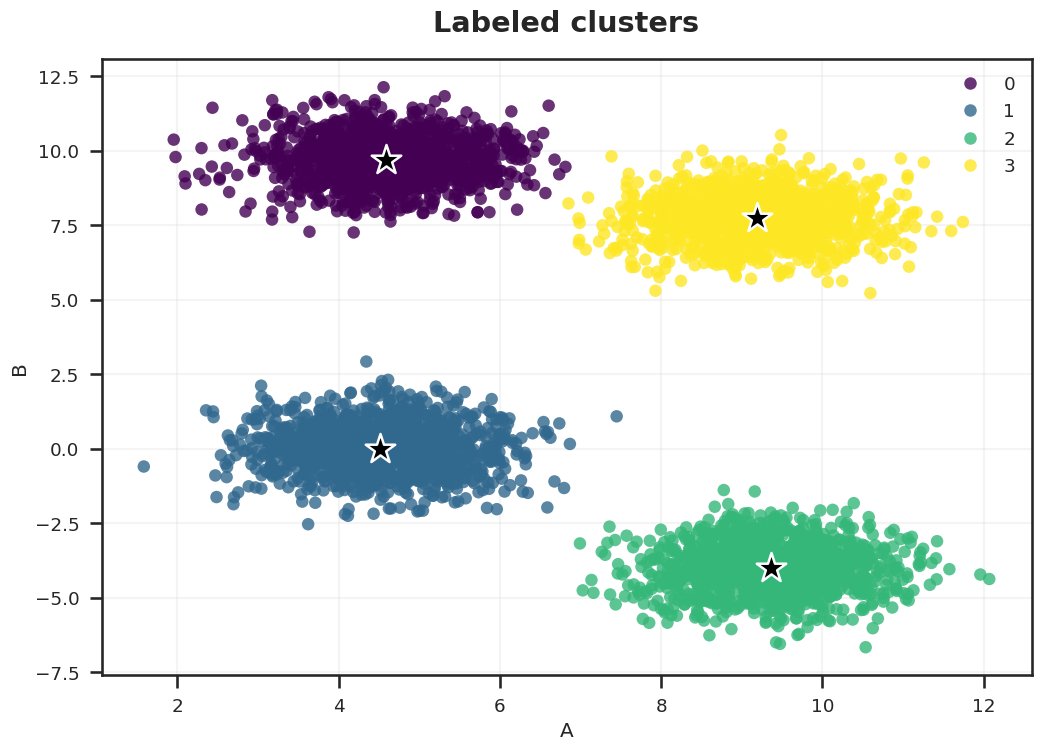

In [58]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroides[:,0], y=centroides[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

In [59]:
#metricas

print(silhouette_score(df, labels))
print(davies_bouldin_score(df, labels))
print(calinski_harabasz_score(df, labels))

0.7447934671599847
0.3611043464649487
47771.84704582711


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

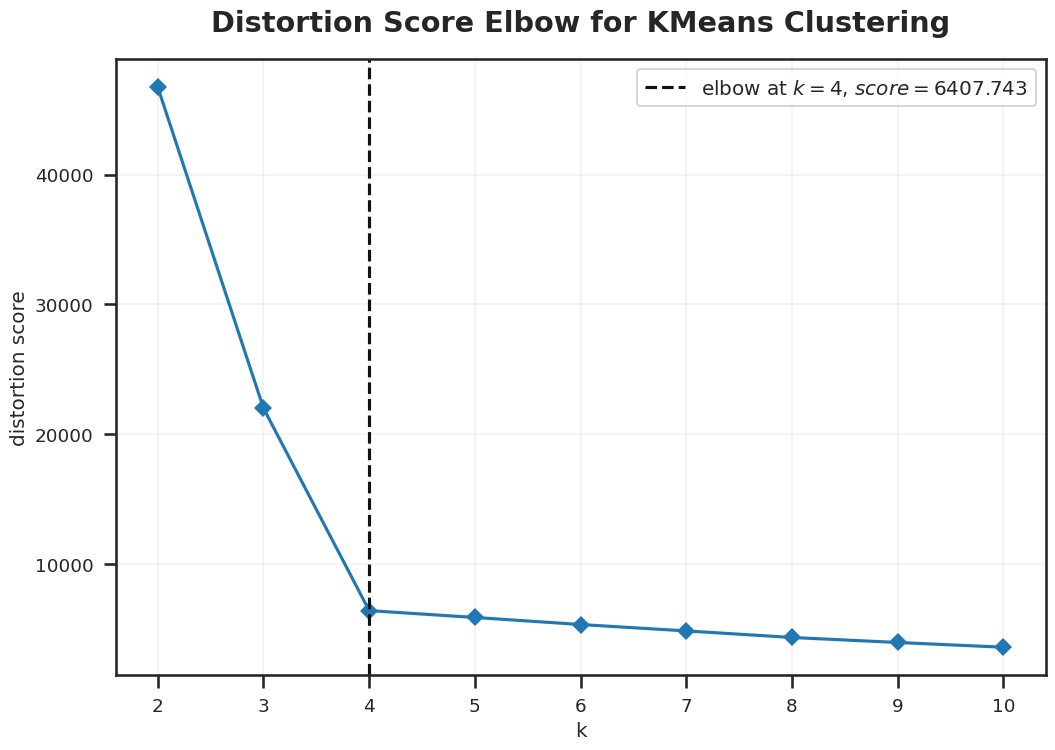

In [60]:
kelbow_visualizer(modelo, df, k=10, timings=False);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

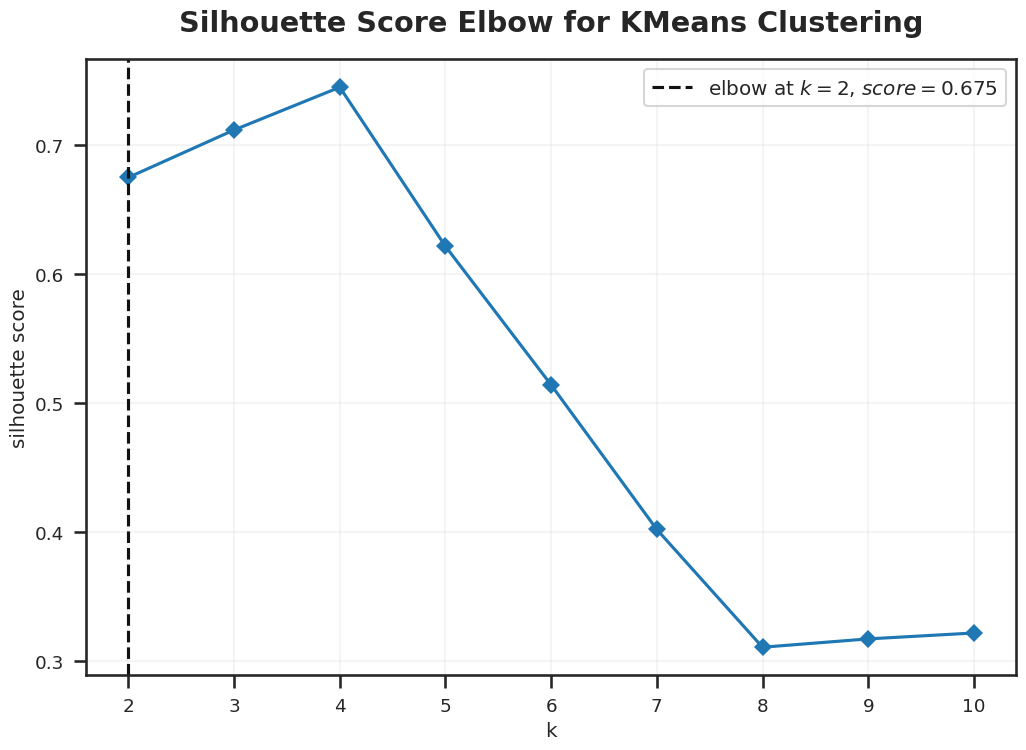

In [61]:
kelbow_visualizer(modelo, df, k=10, timings=False, metric='silhouette');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



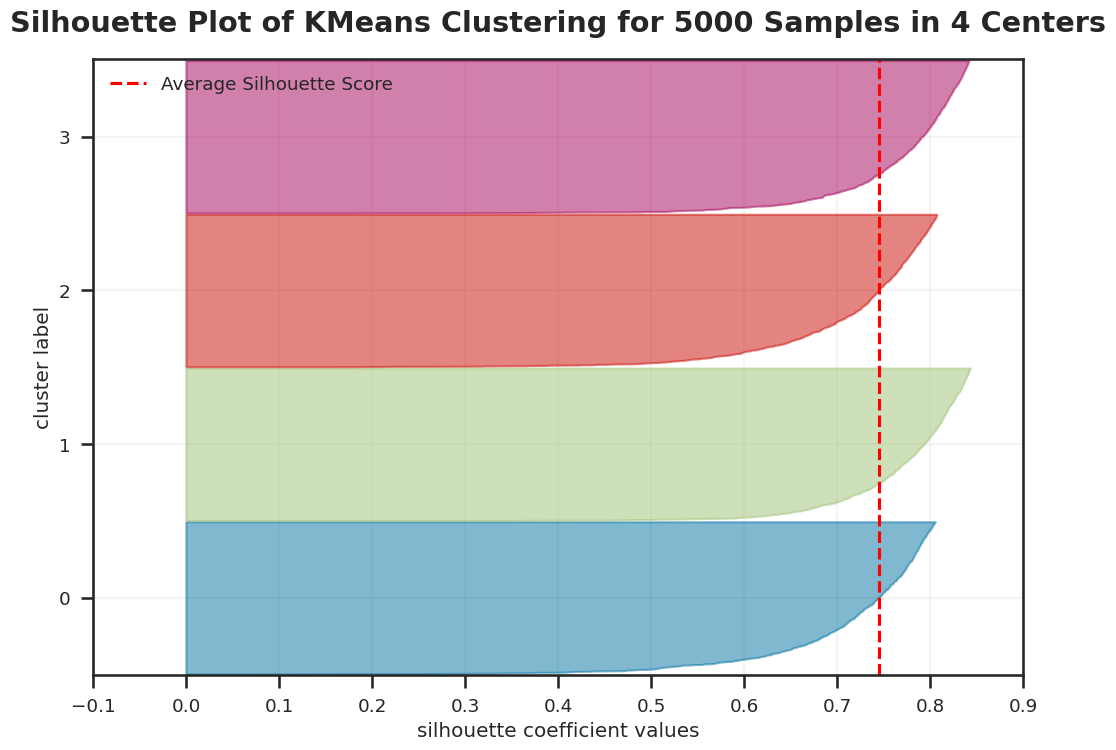

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [62]:
silhouette_visualizer(KMeans(n_clusters=4), df, colors='yellowbrick')

In [63]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(df)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(df, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

[{'k': 2,
  'inertia': 46740.50592075659,
  'silhouette_score': 0.6749373170775771,
  'davies_bouldin_score': 0.5485456968524725,
  'calinski_harabasz_score': 15342.443913225537},
 {'k': 3,
  'inertia': 22003.88379057118,
  'silhouette_score': 0.7116912504551516,
  'davies_bouldin_score': 0.37644396337405617,
  'calinski_harabasz_score': 19100.696477945712},
 {'k': 4,
  'inertia': 6407.742719387135,
  'silhouette_score': 0.7447934671599847,
  'davies_bouldin_score': 0.3611043464649487,
  'calinski_harabasz_score': 47771.84704582711},
 {'k': 5,
  'inertia': 5873.348008506561,
  'silhouette_score': 0.621512929692282,
  'davies_bouldin_score': 0.7302469549884952,
  'calinski_harabasz_score': 39195.78685798263},
 {'k': 6,
  'inertia': 5352.748490529057,
  'silhouette_score': 0.5123473927717862,
  'davies_bouldin_score': 0.975240802278226,
  'calinski_harabasz_score': 34499.62892839007},
 {'k': 7,
  'inertia': 4829.583645047018,
  'silhouette_score': 0.4057536282537446,
  'davies_bouldin_sc

In [64]:
#identificando os melhores valores
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,46740.505921,0.674937,0.548546,15342.443913
3,22003.883791,0.711691,0.376444,19100.696478
4,6407.742719,0.744793,0.361104,47771.847046
5,5873.348009,0.621513,0.730247,39195.786858
6,5352.748491,0.512347,0.975241,34499.628928
7,4829.583645,0.405754,1.130201,31947.674419
8,4326.708841,0.307879,1.259611,30642.387972
9,3939.184936,0.317288,1.147342,29509.137098
10,3570.474457,0.327030,1.050787,28984.654427


In [65]:
# estilizando e indentificando os melhores valores sejam eles positivo ou negativo, isso depende de cada estilo de metricas.
# Por exemplo os valores que são melhores positivo são o calinski , silhoutte.
# o melhor valor negativo e o davis
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,46740.505921,0.674937,0.548546,15342.443913
3,22003.883791,0.711691,0.376444,19100.696478
4,6407.742719,0.744793,0.361104,47771.847046
5,5873.348009,0.621513,0.730247,39195.786858
6,5352.748491,0.512347,0.975241,34499.628928
7,4829.583645,0.405754,1.130201,31947.674419
8,4326.708841,0.307879,1.259611,30642.387972
9,3939.184936,0.317288,1.147342,29509.137098
10,3570.474457,0.327030,1.050787,28984.654427


In [66]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.65667855, 0.25360397],
       [0.09356007, 0.04101032],
       [0.43695186, 0.26636265],
       ...,
       [0.02450386, 0.9071035 ],
       [0.16182378, 0.74124929],
       [0.42540867, 0.47828011]])

In [67]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,517.043228,0.356191,1.179408,3033.573539
3,329.280078,0.376317,0.871039,3805.959797
4,207.256064,0.409582,0.765008,5010.788618
5,173.134627,0.396093,0.826181,4743.973897
6,145.039516,0.386494,0.819248,4722.895833
7,123.440210,0.375091,0.813511,4769.359521
8,106.467743,0.368470,0.789095,4852.167936
9,92.533584,0.363273,0.788076,4978.098166
10,84.470716,0.359563,0.814524,4899.533939


In [68]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,517.043228,0.356191,1.179408,3033.573539
3,329.280078,0.376317,0.871039,3805.959797
4,207.256064,0.409582,0.765008,5010.788618
5,173.134627,0.396093,0.826181,4743.973897
6,145.039516,0.386494,0.819248,4722.895833
7,123.440210,0.375091,0.813511,4769.359521
8,106.467743,0.368470,0.789095,4852.167936
9,92.533584,0.363273,0.788076,4978.098166
10,84.470716,0.359563,0.814524,4899.533939


interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

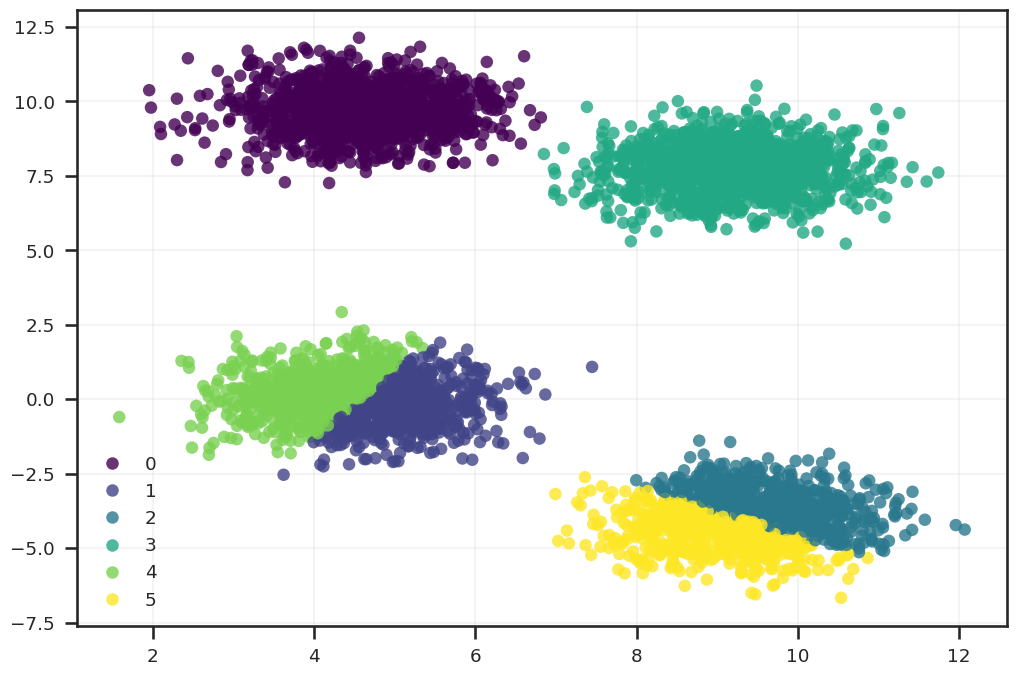

In [69]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

#DIMENSIONALIDADE


In [70]:
#SIMULANDO DADOS

X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [71]:
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


In [72]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


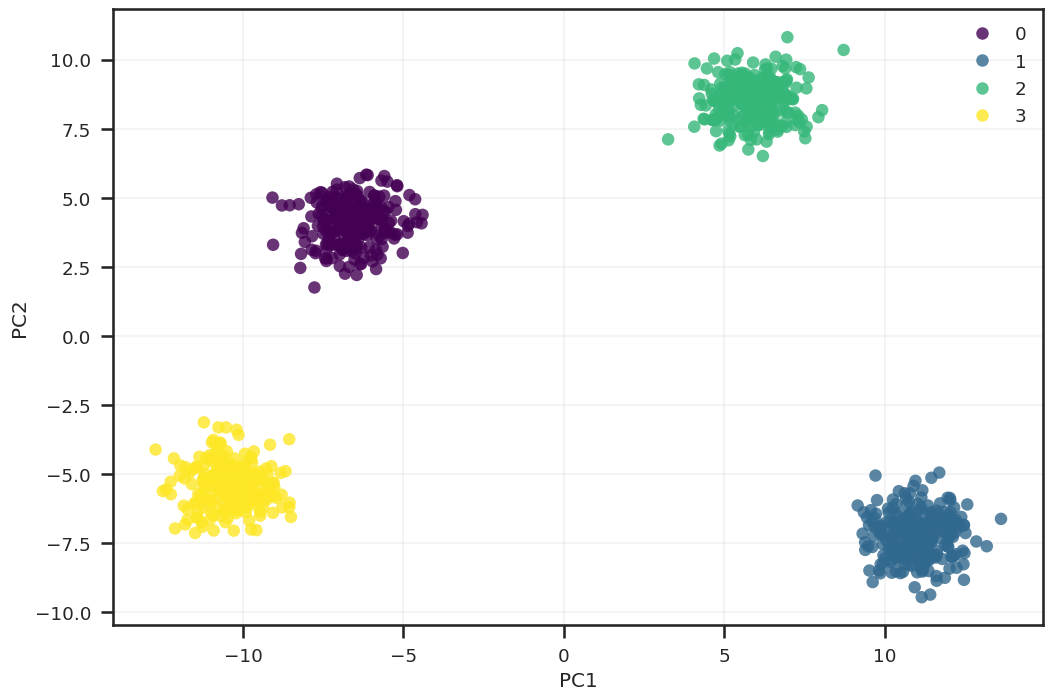

In [73]:
# Plot PCA with true label
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



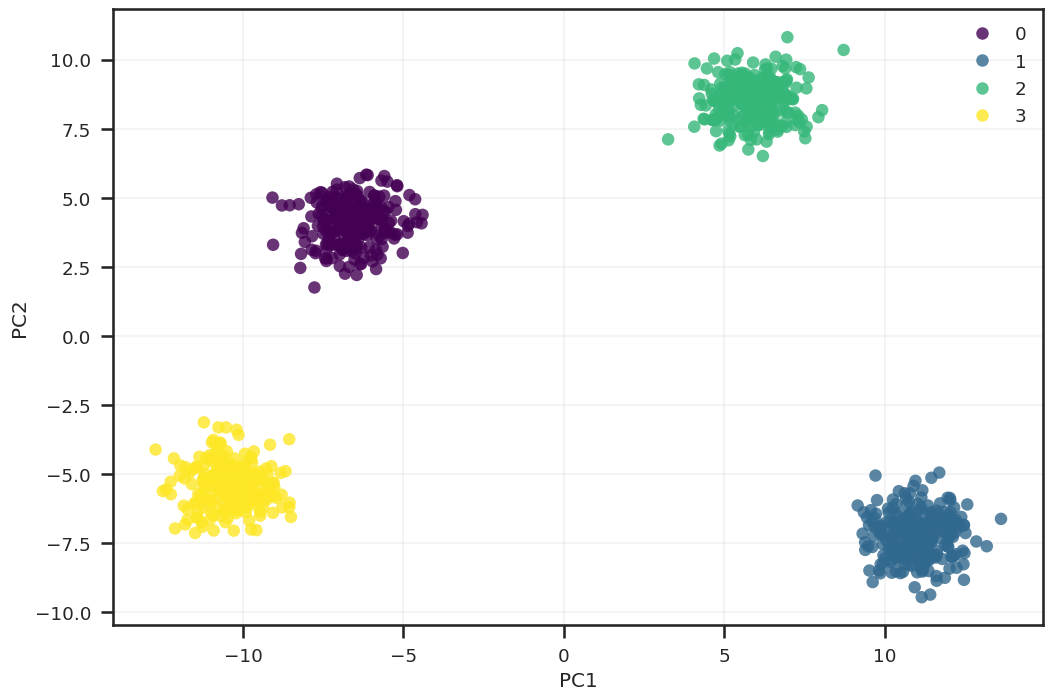

In [74]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [75]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

#Clusterização Hierarquica


In [76]:
#dados sinteticos
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


In [77]:
# Hierarchical clustering with sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

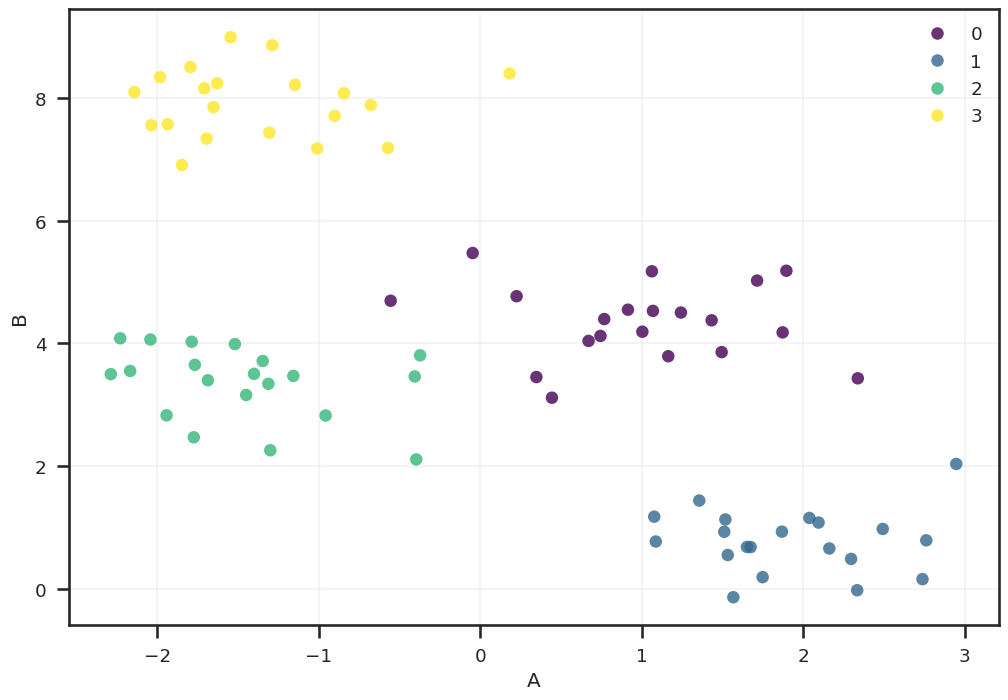

In [78]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

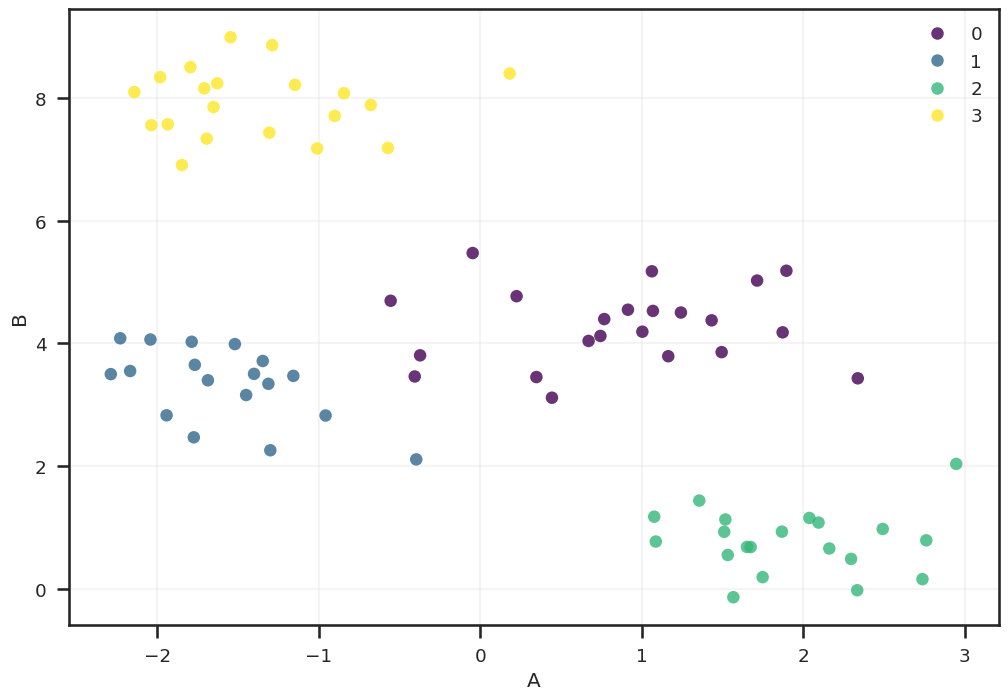

In [79]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

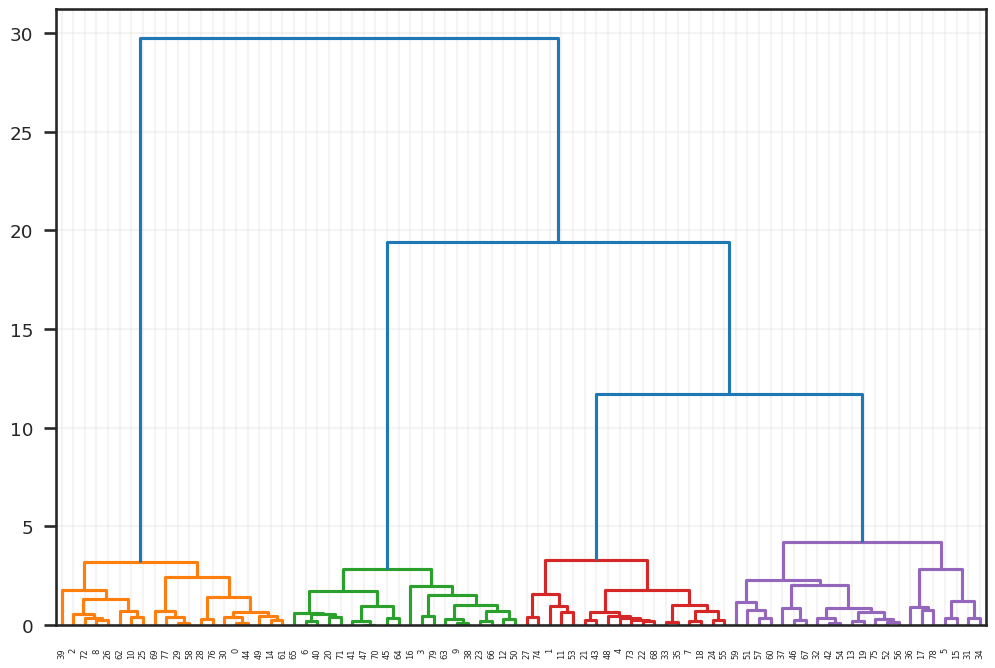

In [80]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.show()

In [81]:
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [82]:
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

#DBSCAN


In [83]:
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


In [84]:
# Train DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

In [85]:
# Train DBSCAN (function)
labels = dbscan(X)[1]

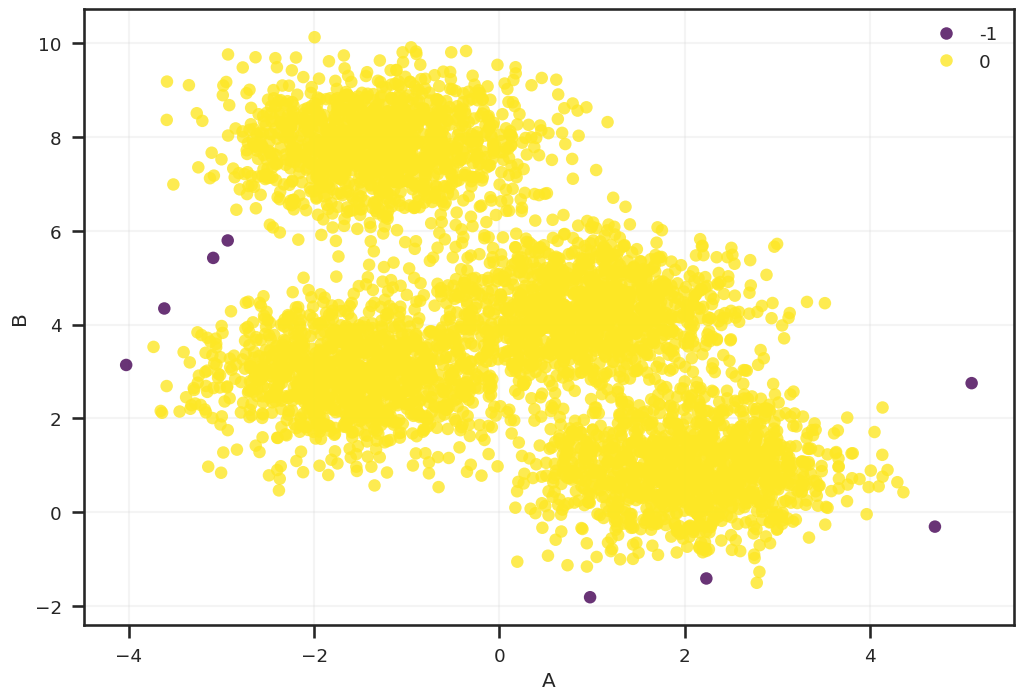

In [86]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [87]:
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10') #ALTERE
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

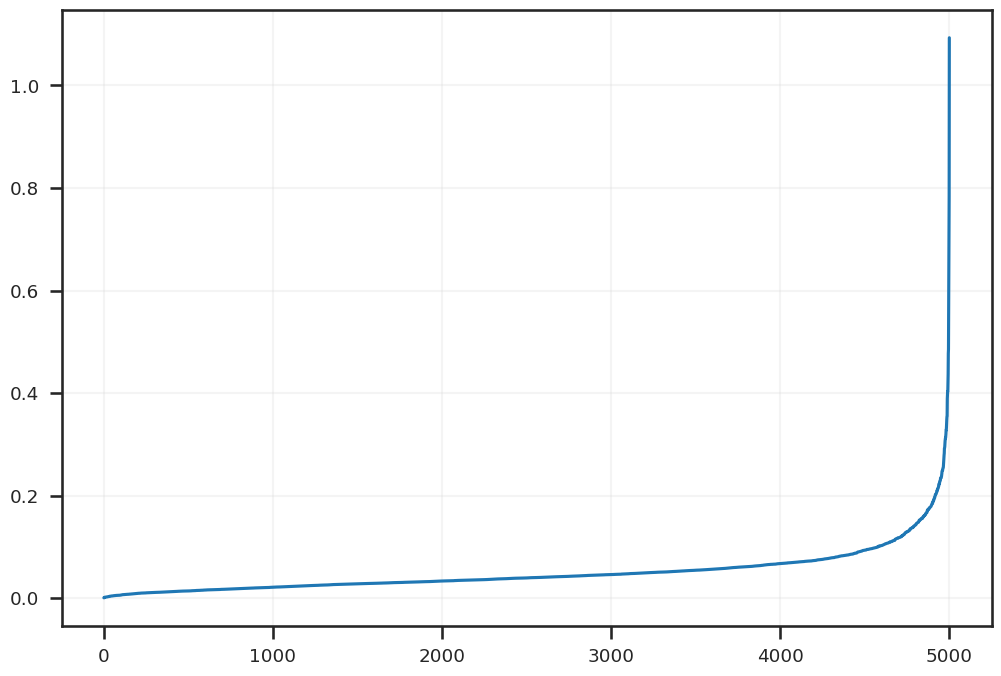

In [88]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc


# Aqui usamos o nearest neighbors para  retirar um grafico parecido com o cotovelo, aonde o numero da curva vai ser o que usaremos para definir o EPS .
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

In [89]:
#simulando dados
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


<Axes: xlabel='A', ylabel='B'>

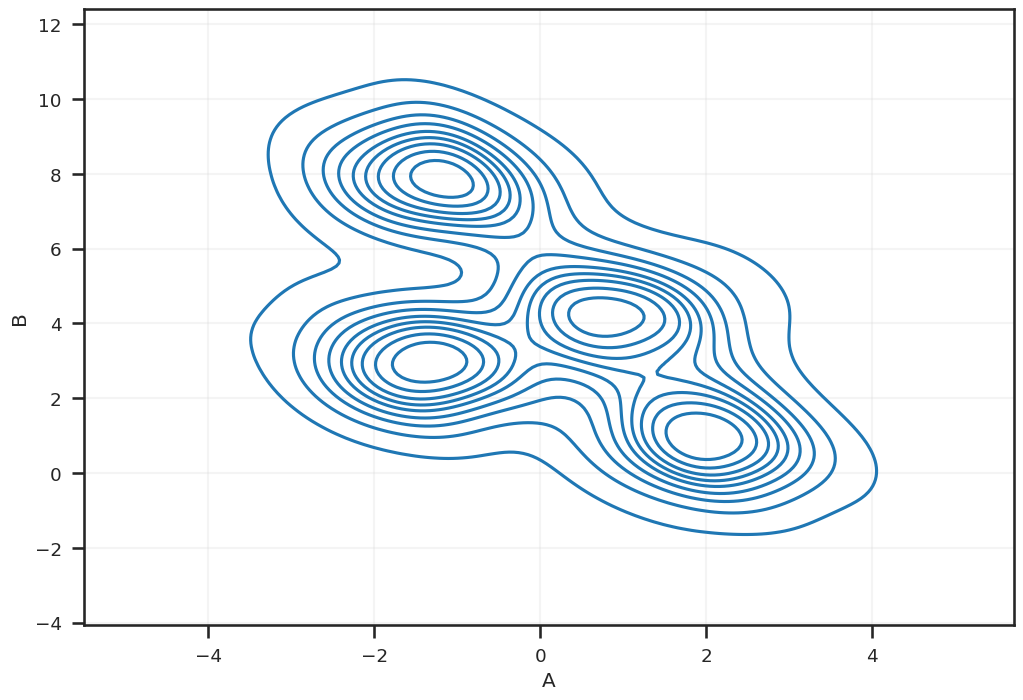

In [90]:
#densidade
sns.kdeplot(data=df, x='A', y='B')


In [91]:
model = MeanShift()
labels = model.fit_predict(X)

In [92]:
#estimando
estimate_bandwidth(X)

2.822735629625506

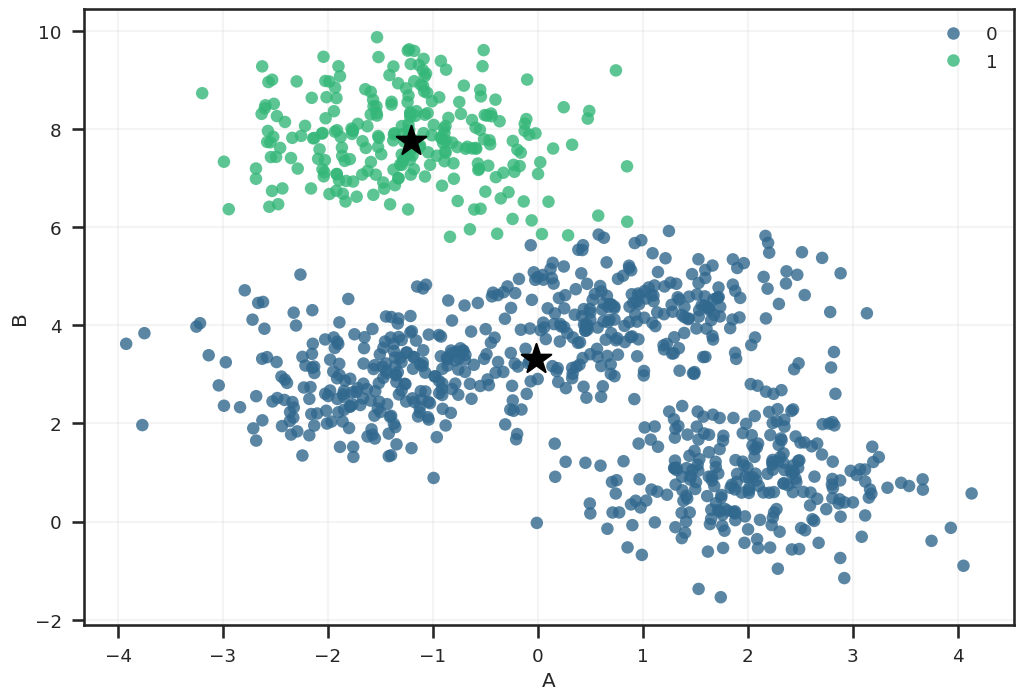

In [93]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
plt.show()

In [94]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, cluster_all=True)
  labels = model.fit_predict(X)
  ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
  plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

In [95]:
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


In [96]:
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [97]:
model.means_
model.covariances_
model.weights_

array([0.25158224, 0.24986594, 0.24968019, 0.24887163])

In [98]:
model.bic(X)

7426.446346516004

In [99]:
model.predict(X)[:5]

array([1, 0, 1, 3, 2])

In [100]:
model.predict_proba(X)[:5]

array([[4.28701780e-08, 9.99999955e-01, 1.87914163e-24, 2.16968923e-09],
       [9.83559786e-01, 3.02465027e-07, 8.45136238e-05, 1.63553975e-02],
       [6.28344104e-10, 9.99999999e-01, 4.36991774e-28, 2.43654698e-11],
       [7.77829776e-06, 1.71620307e-12, 3.65115864e-08, 9.99992185e-01],
       [2.10229265e-04, 9.99148478e-21, 9.99788809e-01, 9.62031778e-07]])

In [101]:
model.means_.T

array([[ 0.91393703, -1.28881752,  1.99505136, -1.46918035],
       [ 4.26992492,  7.85184401,  0.85873441,  2.9168736 ]])

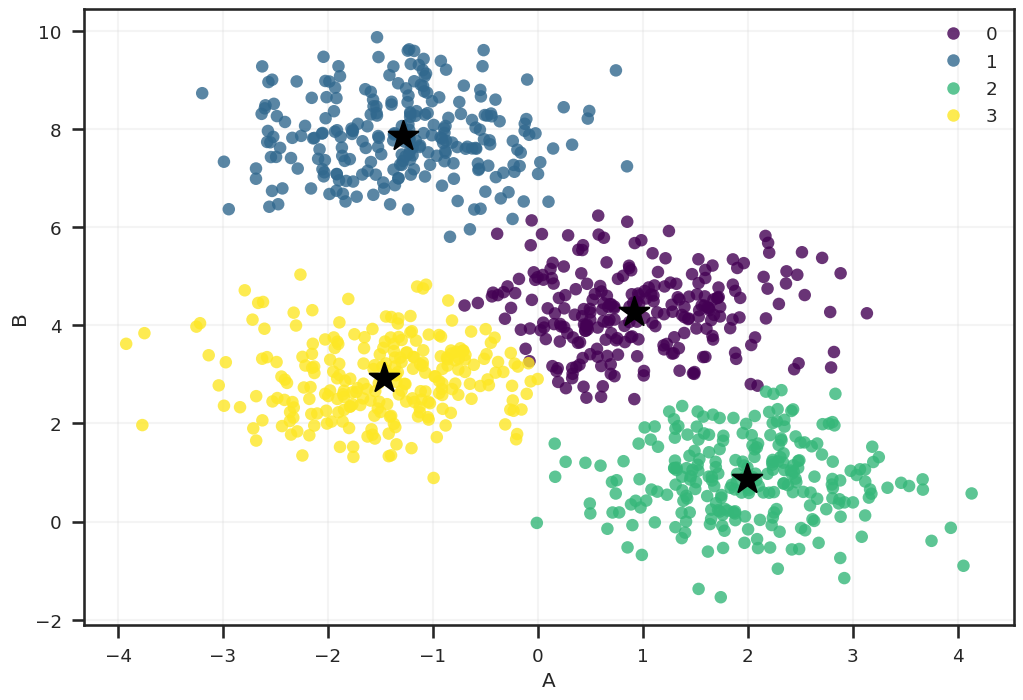

In [102]:
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, marker='*', color='black', s=500);

In [103]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

,bic,n_components,covariance_type
0,8357.218909,1,full
1,8357.218909,1,tied
2,8679.299153,1,diag
3,8889.310673,1,spherical
4,7976.527656,2,full
5,8165.511057,2,tied
6,8050.082533,2,diag
7,8036.917677,2,spherical
8,7526.427331,3,full
9,7736.189981,3,tied


In [104]:
results.sort_values('bic').head()

,bic,n_components,covariance_type
13,7419.260030,4,tied
15,7426.425803,4,spherical
17,7440.044709,5,tied
14,7450.141842,4,diag
19,7457.306052,5,spherical


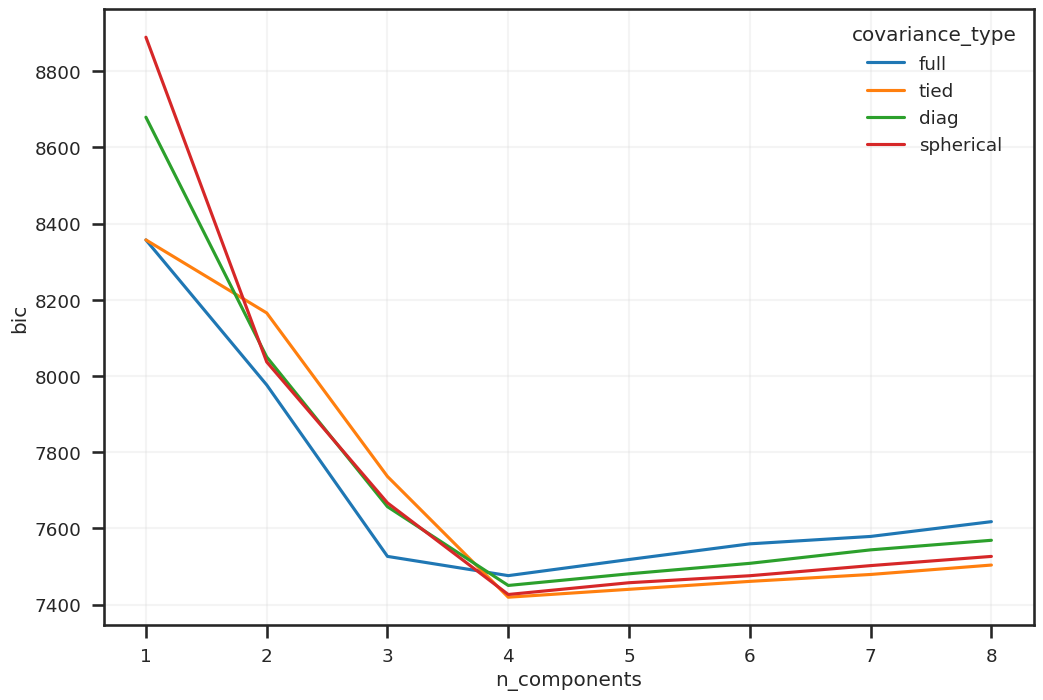

In [105]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');